In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D
import csv

Using TensorFlow backend.


C:\ProgramData\Anaconda3\envs\AI-GPU\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\AI-GPU\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\AI-GPU\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 26178 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\AI-GPU\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 38291 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\envs\AI-GPU\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 28204 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\AI-GPU\lib\site-packages\matplotlib\bac

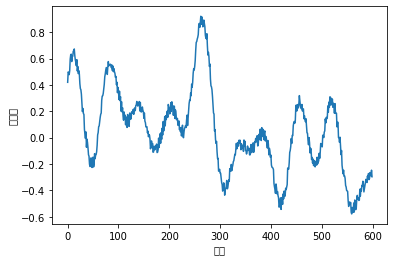

In [2]:
# 時系列データを作成
timeline = np.arange(10000)
#epochs = 100
epochs = 100

def sinnp(n, line):
    return np.sin(line * n / 100)

def cosnp(n, line):
    return np.cos(line * n / 100)

raw_data = (sinnp(1, timeline) + sinnp(3, timeline) + sinnp(10, timeline) + cosnp(5, timeline) + cosnp(7, timeline)) / 5
raw_data = raw_data + (np.random.rand(len(timeline)) * 0.1)# ノイズ項
plt.plot(timeline[:600], raw_data[:600])
plt.xlabel("時間")
plt.ylabel("測定値")
plt.show()

In [3]:
raw_data.shape

(10000,)

In [4]:
# 連続した64個の時系列データを元に、次の16個の時系列データを生成する
input_data = []
output_data = []
for n in range(10000-80):
    input_data.append(raw_data[n:n+64])
    output_data.append(raw_data[n+64:n+80])

input_data = np.array(input_data)
output_data = np.array(output_data)
print(input_data.shape)
print(output_data.shape)

(9920, 64)
(9920, 16)


In [5]:
# Shift_JISに指定
with open("stock.csv", "w", encoding="Shift_jis") as f: # 文字コードを
    writer = csv.writer(f, lineterminator="\n") # writerオブジェクトの作成 改行記号で行を区切る
    writer.writerows(input_data) # csvファイルに書き込み


In [6]:
# 一次元畳み込みでは、データの形状に注意する必要があります。
# 一次元畳み込みそうにおける入力の形状(shape)は(<シーケンス長>, <パラメータ数>)となっていなければなりません。
# 今回、グラフを作るためのパラメータの個数、
# つまり、f(t)f(t)は一次元なので、パラメータ数は1となります。
# シーケンス長はサンプルとして取ってくる連続したデータ点の個数となりますので、今回は64となります。

train_X = np.reshape(input_data, (-1, 64, 1))
train_Y = np.reshape(output_data, (-1, 16, 1))
print(train_X.shape)
print(train_Y.shape)

(9920, 64, 1)
(9920, 16, 1)


In [7]:
# 学習器を作る
model = Sequential()

model.add(Conv1D(64, 8, padding='same', input_shape=(64, 1), activation='relu'))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(64, 8, padding='same', activation='relu'))
model.add(MaxPooling1D(2, padding='same'))
model.add(Conv1D(32, 8, padding='same', activation='relu'))
model.add(Conv1D(1, 8, padding='same', activation='tanh'))

model.compile(loss='mse', optimizer='adam')

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 64, 64)            576       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 32, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 32, 64)            32832     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 16, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 16, 32)            16416     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 16, 1)             257       
Total params: 50,081
Trainable params: 50,081
Non-trainable params: 0
__________________________________________________

In [9]:
history = model.fit(train_X, train_Y, validation_split=0.1, epochs=epochs)

Train on 8928 samples, validate on 992 samples
Epoch 1/100


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv1d_1/convolution (defined at C:\ProgramData\Anaconda3\envs\AI-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_1292]

Function call stack:
keras_scratch_graph


In [10]:
plt.plot(range(epochs), history.history['loss'], label='loss')
plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend() 
plt.show()

NameError: name 'history' is not defined

In [11]:
start = 9100
sheed = np.reshape(raw_data[start:start+64], (1, 64, 1))
prediction = sheed

for i in range(20):
    res = model.predict(sheed)
    sheed = np.concatenate((sheed[:, 16:, :], res), axis=1)
    prediction = np.concatenate((prediction, res), axis=1)

UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node conv1d_1/convolution (defined at C:\ProgramData\Anaconda3\envs\AI-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]] [Op:__inference_keras_scratch_graph_1453]

Function call stack:
keras_scratch_graph


(1, 64, 1)
(64,)


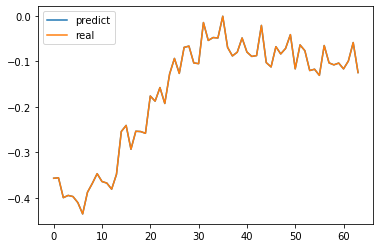

In [12]:
print(prediction.shape)
predictor = np.reshape(prediction, (-1))
print(predictor.shape)
plt.plot(range(len(predictor)), predictor, label='predict')
plt.plot(range(len(predictor)), raw_data[start:start + len(predictor)], label='real')
plt.legend() 
plt.show()